DATASET BEING USED
https://universe.roboflow.com/deneme-dkwky/mth-nzad1


Verify NVIDIA GPU availability

"Runtime --> Change Runtime Type. --> T4 GPU" must be enabled


In [2]:
!nvidia-smi

Wed Feb 19 13:58:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Install Ultralytics python library that is used to train YOLO model

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.2/915.2 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 830.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

Split Data into train and validation folders. First unzip folder. drag data.zip into colab files. zip file should contain a train folder and a validation folder that each have image and label folders. roughly 90% of data should be in train and the rest should be in validation.

Folder should also contain a classes.txt with the classes for the labels

unzipped directory will have an additional data directory to go into if zip file is from macosx (it is in this case)

In [4]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/data

custom pyhton code is from https://www.youtube.com/watch?v=r0RspiLG260 tutorial and creates the data.yaml config file needed to train model


In [6]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/data/data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 3
names:
- car
- pedestrian
- traffic sign


Time to run training! I will use YOLOv11s as that is what is used in the tutorial. Different versions have performance differences so knowing the type of systemm it will run is important to determine which to use.

imgsz should be the square resolution of the images from dataset. For this example the images are 720x720. epochs are the number of training trials the model will undergo

Here we are using yolo11s model as the s version runs better on less strong hardware.

Say every vehicle has a raspberry pi that records camera dashcam video and runs the model. We would want a higher performancee model for the weaker hardware we are using.

In [9]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=720

Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=720, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

After training we need to test the model. if you needed to train the model again because of an error, you will have to rename the train runs/detect/train1 directory to just 'train'

In [11]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/5 /content/data/validation/images/ExternDisk0_ch4_20210810125200_20210810125301_7_jpg.rf.66fad19de0e9c0288863c52a72c3805c.jpg: 736x736 12 cars, 2 pedestrians, 18.5ms
image 2/5 /content/data/validation/images/ExternDisk0_ch4_20210810130000_20210810130100_33_jpg.rf.2aab15bdf73f067f1287e1b39c005a9b.jpg: 736x736 14 cars, 2 pedestrians, 5 traffic signs, 19.6ms
image 3/5 /content/data/validation/images/ExternDisk0_ch4_20210810130100_20210810130201_18_jpg.rf.01156fe4ba5f1eb488098e6c2369fc9b.jpg: 736x736 8 cars, 3 traffic signs, 18.5ms
image 4/5 /content/data/validation/images/ExternDisk0_ch4_20210810130100_20210810130201_38_jpg.rf.1d4bc62cda16bff58d57dd607841a921.jpg: 736x736 6 cars, 9 pedestrians, 3 traffic signs, 18.4ms
image 5/5 /content/data/validation/images/ExternDisk0_ch4_20210810130201_20210810130300_44_jpg.rf.11

This python code will add bounding boxes to each image representing what the model detected

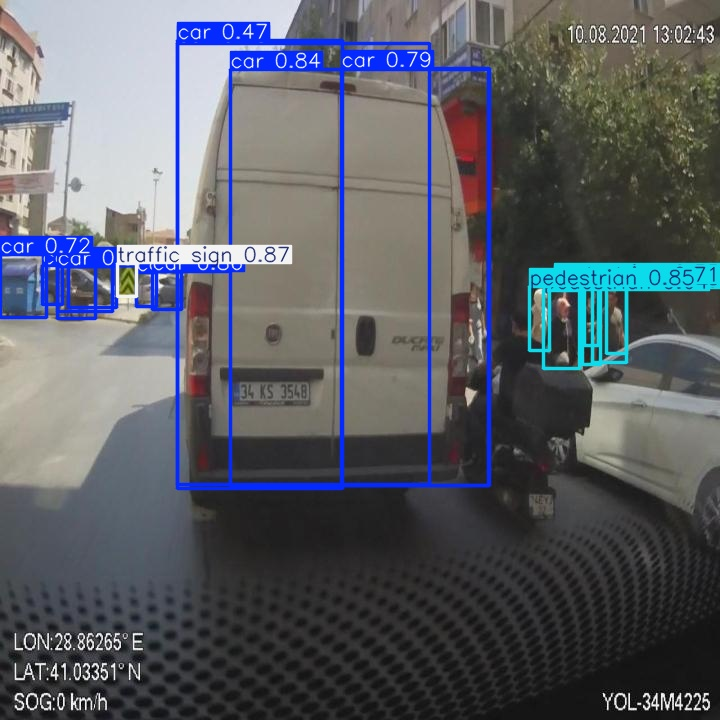

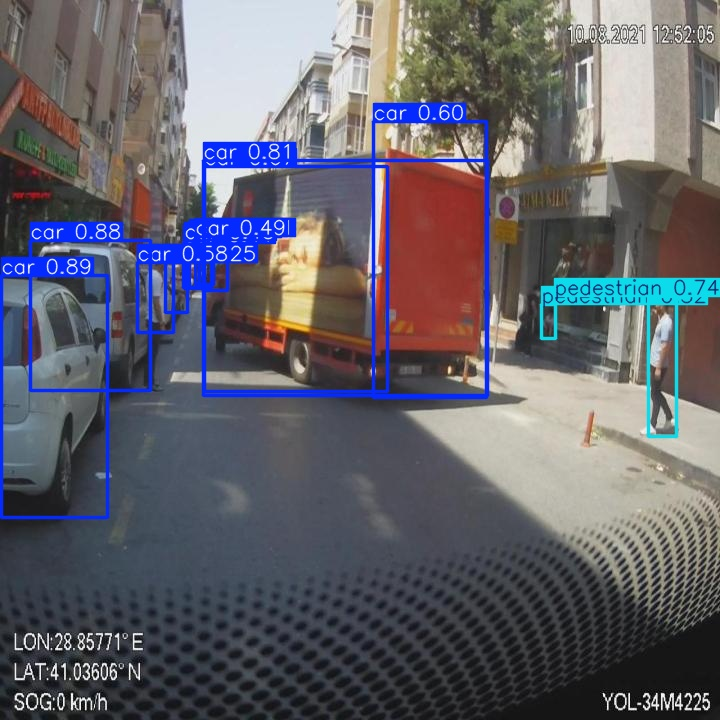

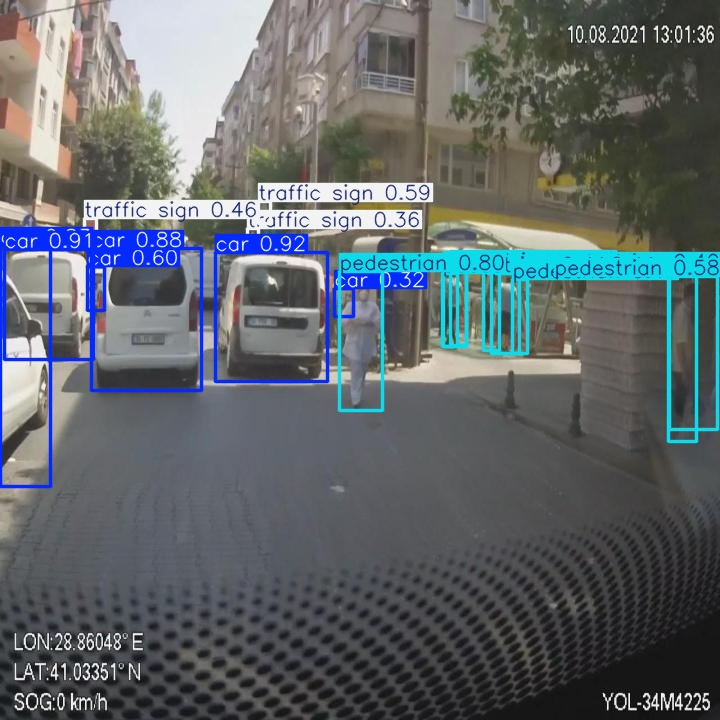

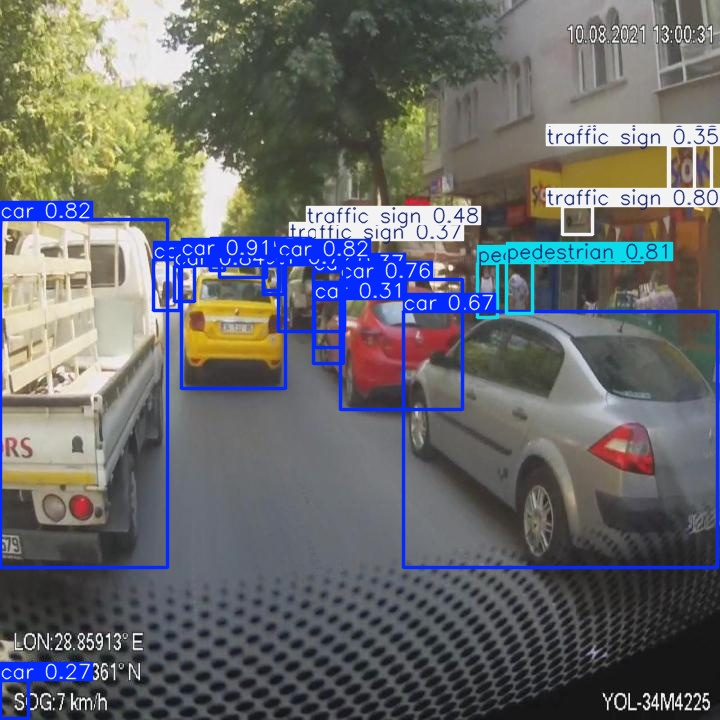

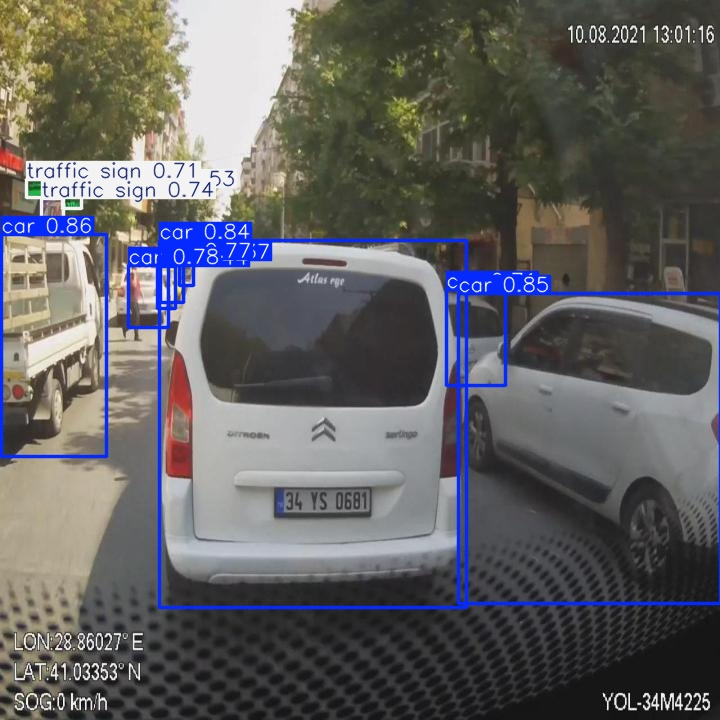

In [14]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')
